In [5]:
# Import all the required Library 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data= pd.read_csv(r"D:\python\dataset1-master\abalone.csv")

In [7]:
data 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Here data is having 4177 rows × 9 columns. 

Sex is calagorical , Length	Diameter,Height, Whole weight, Shucked weight, Viscera weight, Shell weight are contineus data.

Rings are ordinal data.


In [10]:
data.shape

(4177, 9)

In [11]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Data is not having any null value.

<AxesSubplot:>

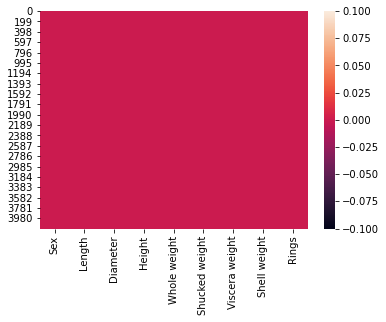

In [12]:
sns.heatmap(data.isnull())

In [14]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Here sex column is object , Rings are intiger type and other are float value. 

So in next step, we will encode sex column.

In [20]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [22]:
data.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


We can see our data is now encoded using LabelEncoder.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


Here also we can check that data is not having null values and type of data also.

In [44]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

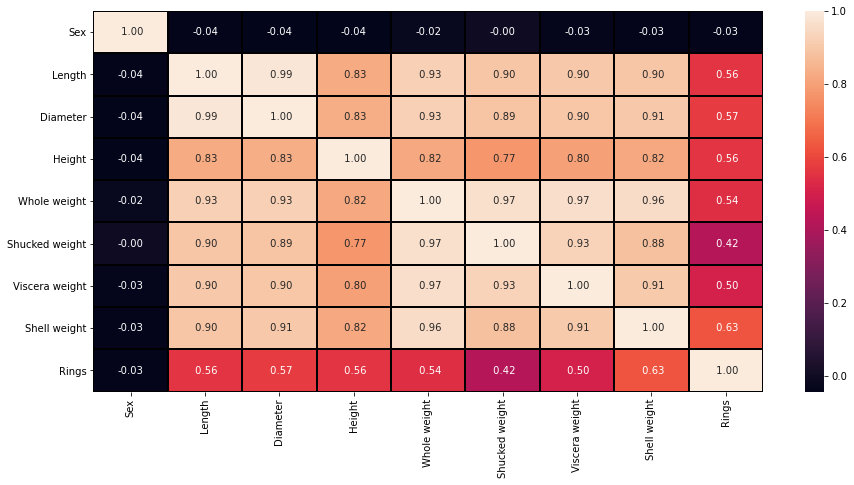

In [45]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True,linewidths=1,linecolor='black',fmt=' .2f')

Here we can see all the columns (Length	Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight) are having strong corelation, only sex is having negative or near zero corelation.

In [49]:
data= data.drop('Sex',axis=1)

In [50]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [53]:
# Calculating the age of as per the given diraction.
data['Age']= data['Rings']+1.5
data= data.drop('Rings',axis=1)

In [54]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


Here we have added new column "Age" as per the quetion.

# Univariate analysis of the data

In [26]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

Here we can see our data columns Diameter, Height, Whole weight, Shucked weight. Viscera weight, Shell weight having skewness.

<AxesSubplot:xlabel='Length', ylabel='Density'>

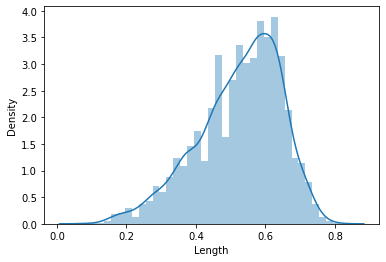

In [37]:
sns.distplot(data.Length)

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

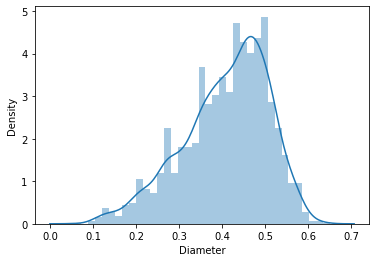

In [31]:
sns.distplot(data['Diameter'])

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Height', ylabel='Density'>

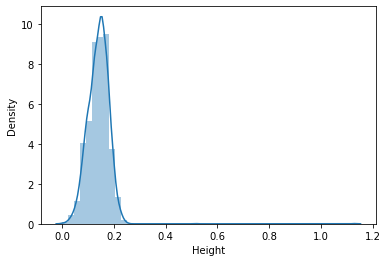

In [36]:
sns.distplot(data['Height'])

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

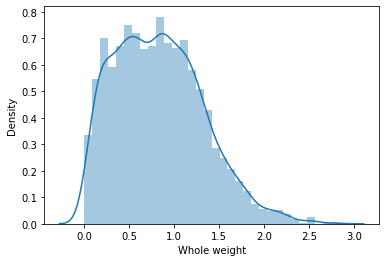

In [32]:
sns.distplot(data['Whole weight'])

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

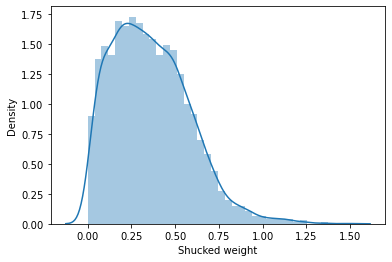

In [33]:
sns.distplot(data['Shucked weight'])

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

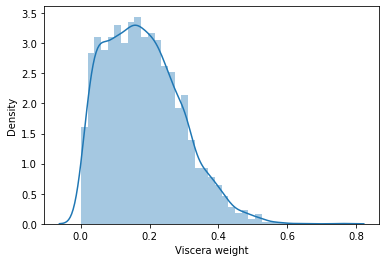

In [34]:
sns.distplot(data['Viscera weight'])

The Data is not normalised. The building blocks are out of normalised curve.

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

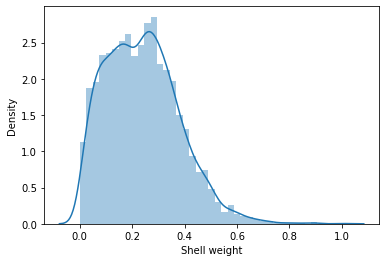

In [35]:
sns.distplot(data['Shell weight'])

The Data is not normalised. The building blocks are out of normalised curve.

# Bivariate analysis of the data

<AxesSubplot:xlabel='Age', ylabel='Length'>

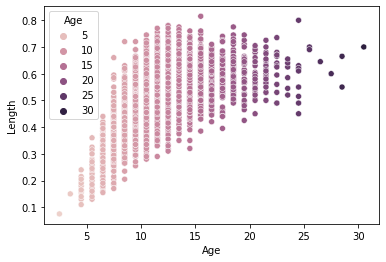

In [57]:
sns.scatterplot(data=data, x="Age", y="Length", hue="Age")

<AxesSubplot:xlabel='Age', ylabel='Diameter'>

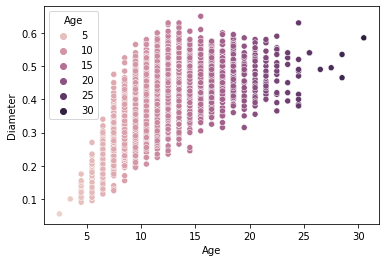

In [58]:
sns.scatterplot(data=data, x="Age", y="Diameter", hue="Age")

<AxesSubplot:xlabel='Age', ylabel='Height'>

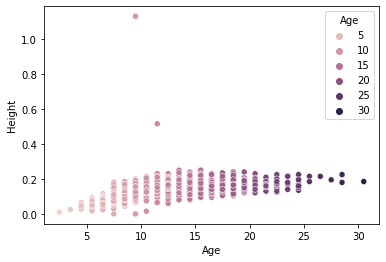

In [59]:
sns.scatterplot(data=data, x="Age", y="Height", hue="Age")

<AxesSubplot:xlabel='Age', ylabel='Whole weight'>

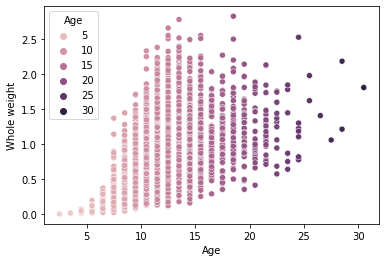

In [60]:
sns.scatterplot(data=data, x="Age", y="Whole weight", hue="Age")

<AxesSubplot:xlabel='Age', ylabel='Shucked weight'>

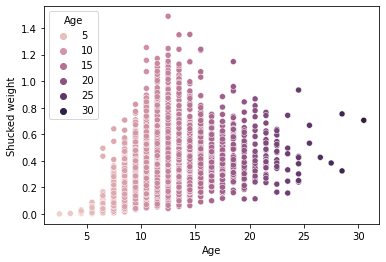

In [61]:
sns.scatterplot(data=data, x="Age", y="Shucked weight", hue="Age")

<AxesSubplot:xlabel='Age', ylabel='Viscera weight'>

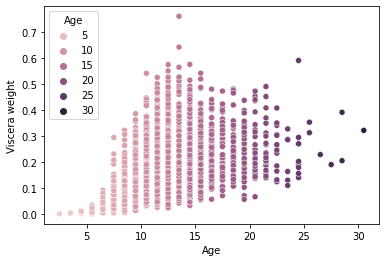

In [62]:
sns.scatterplot(data=data, x="Age", y="Viscera weight", hue="Age")

<AxesSubplot:xlabel='Age', ylabel='Shell weight'>

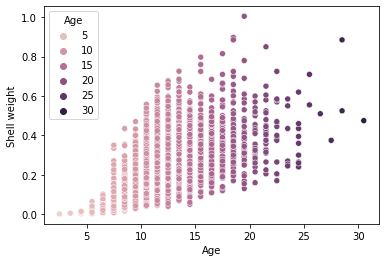

In [63]:
sns.scatterplot(data=data, x="Age", y="Shell weight", hue="Age")

# Multivariate analysis using pair plot.

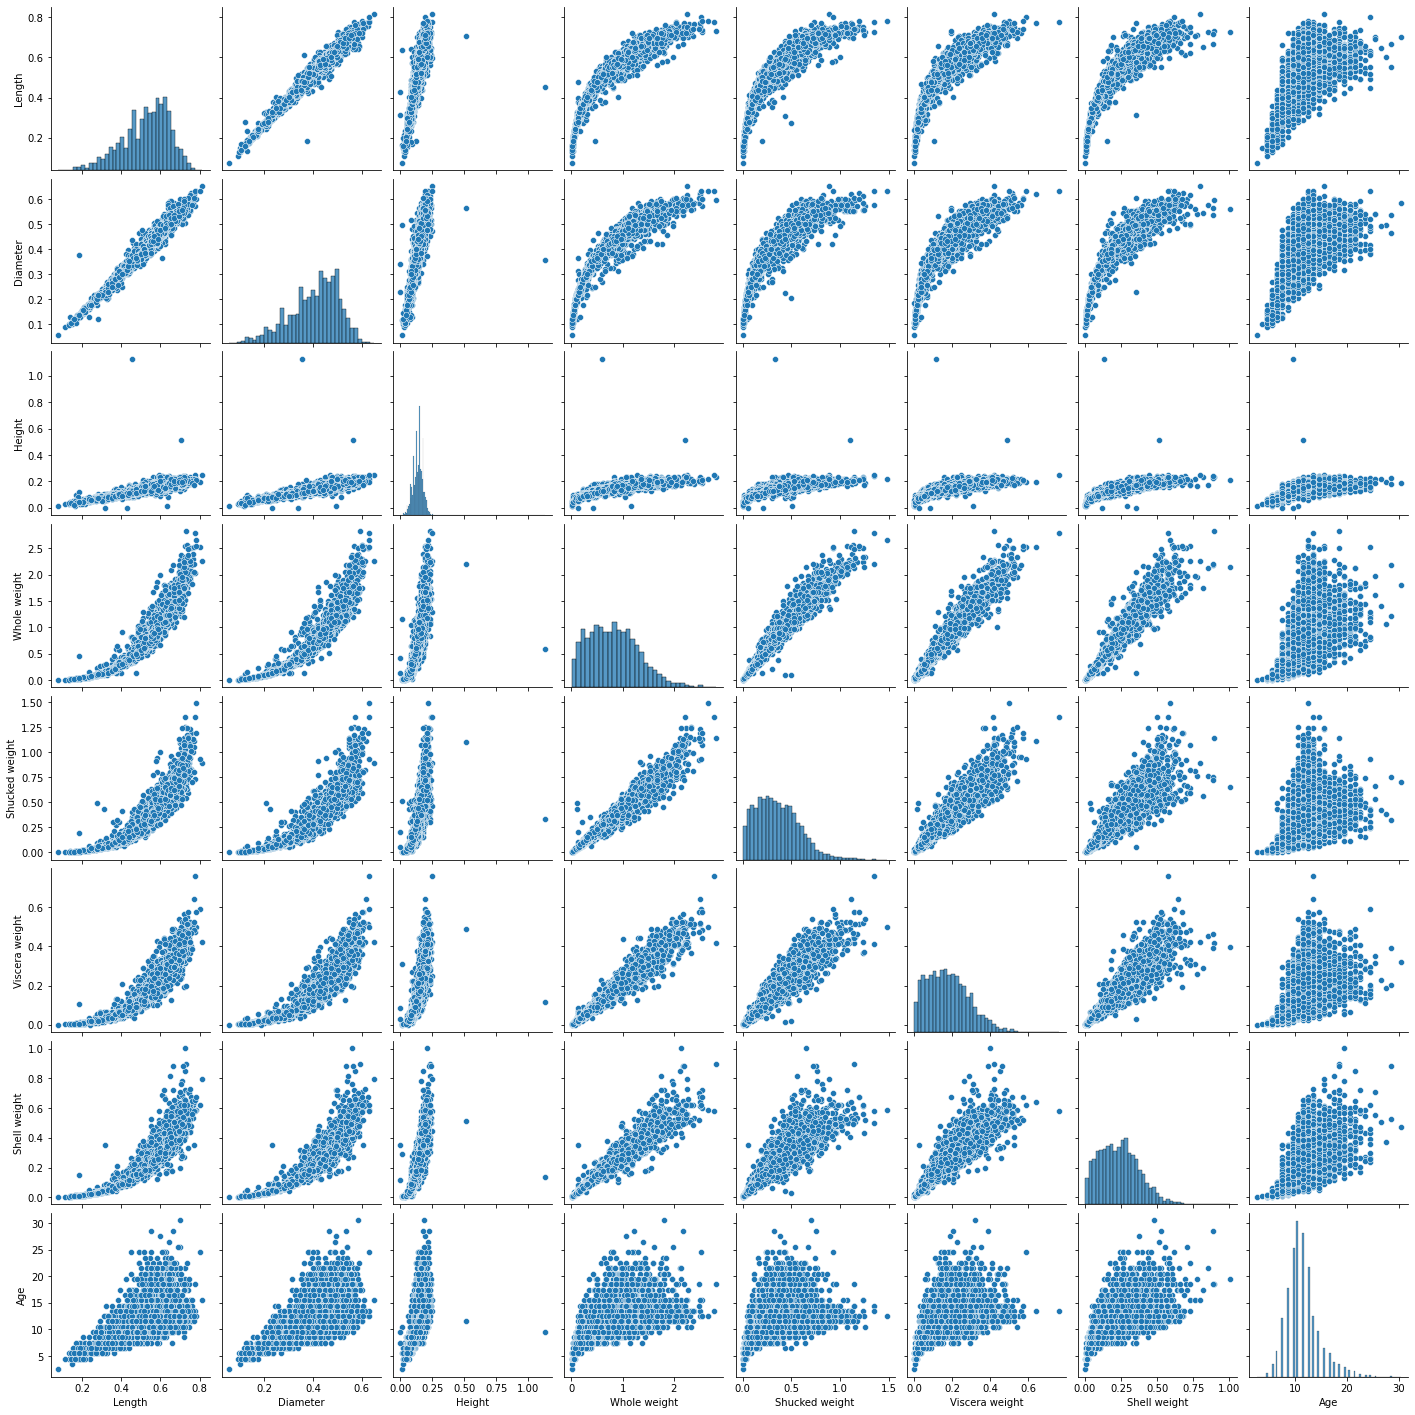

In [65]:
sns.pairplot(data)

In [67]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


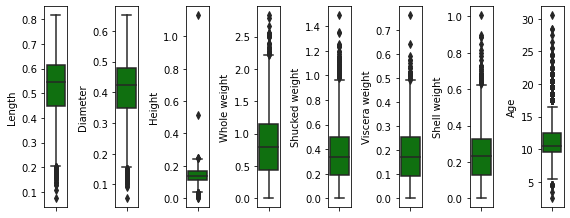

In [68]:
collist=data.columns.values
ncol= 10
nrows= 10
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=data[collist[i]],color='green', orient='x')
    plt.tight_layout()

Here we can see ouliers are present in the data.

# Removing outliers

In [69]:
from scipy.stats import zscore

z=np.abs(zscore(data))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [71]:
threshold= 3 
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [72]:
df_new = data[(z<3).all(axis=1)]
print(data.shape)
print(df_new.shape)

(4177, 8)
(4027, 8)


In [73]:
Loss_percentage=(4177-4027)/4177*100
print(Loss_percentage)

3.5910940866650707


As our Loss_percentage is 3.5910940866650707, we can use our df_new for further process.

# Removing Skweness

In [74]:
from sklearn.preprocessing import power_transform

Dividing data in feature and vectors.

In [87]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [88]:
x=power_transform(x,method='yeo-johnson')

We have removed sekwness.

# Scaling the data Using StandardScaler.

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [115]:
x.shape

(4027, 7)

In [116]:
y.shape

(4027,)

In [98]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [130]:
for i in range(0, 100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    print(f"At Random Stat {i}, the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At Random Stat {i}, the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At Random Stat 0, the training accuracy is:0.5194015389264766
At Random Stat 0, the testing accuracy is:0.4818046108619105


At Random Stat 1, the training accuracy is:0.5179011842814742
At Random Stat 1, the testing accuracy is:0.4867041568800342


At Random Stat 2, the training accuracy is:0.5139840617179326
At Random Stat 2, the testing accuracy is:0.505500840508265


At Random Stat 3, the training accuracy is:0.5135551691686369
At Random Stat 3, the testing accuracy is:0.50649035224791


At Random Stat 4, the training accuracy is:0.5110098284810829
At Random Stat 4, the testing accuracy is:0.5169136142613011


At Random Stat 5, the training accuracy is:0.5173884156414115
At Random Stat 5, the testing accuracy is:0.49133735518861776


At Random Stat 6, the training accuracy is:0.5104395554810361
At Random Stat 6, the testing accuracy is:0.5185254378480804


At Random Stat 7, the training accuracy is:0.5211341508979476
At Random Stat 7, the testing accuracy is:0.4756517473862032


At


At Random Stat 34, the training accuracy is:-0.5120750093506284
At Random Stat 34, the testing accuracy is:-0.5131584134415292

In [131]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state= 34)

In [132]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)

print(r2_score(y_test,pred_test))

0.5131584134415292


# Cross Validation of Model

In [141]:
Train_accuracy= r2_score(y_train, pred_train),
Test_accuracy= r2_score(y_test, pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr, x,y, cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for testting {Test_accuracy}")
    

At cross fold 2 the cv score is 0.5090307146974535 and accuracy score for testting 0.5131584134415292
At cross fold 3 the cv score is 0.4975614022244246 and accuracy score for testting 0.5131584134415292
At cross fold 4 the cv score is 0.43245535580810857 and accuracy score for testting 0.5131584134415292
At cross fold 5 the cv score is 0.4235147420414231 and accuracy score for testting 0.5131584134415292
At cross fold 6 the cv score is 0.43329251155229853 and accuracy score for testting 0.5131584134415292
At cross fold 7 the cv score is 0.4443338018201988 and accuracy score for testting 0.5131584134415292
At cross fold 8 the cv score is 0.409640126241561 and accuracy score for testting 0.5131584134415292
At cross fold 9 the cv score is 0.4307455108083101 and accuracy score for testting 0.5131584134415292


In [ ]:
At cross fold 2 the cv score is 0.5090307146974535 and accuracy score for testting 0.5131584134415292

In [142]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


In [143]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

In [144]:
for i in models:
    create_model(i)

KNeighborsRegressor()
Mean absolute error 1.529528535980149
Mean squared error 4.396029776674938
Root Mean squared error 2.096671117909277
R2 Score 0.46984286046052703
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 1.4126722047449387
Mean squared error 3.8870050434576795
Root Mean squared error 1.97154889451357
R2 Score 0.5312307741523727
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 2.0136476426799006
Mean squared error 7.750620347394541
Root Mean squared error 2.7839935968666563
R2 Score 0.06528232933419298
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 1.520958675128433
Mean squared error 4.036859925896292
Root Mean squared error 2.0091938497557402
R2 Score 0.5131584134415292
-------------------------

RandomForestRegressor()  Having good accuracy.

In [145]:
RF=RandomForestRegressor()
RF.fit(x,y)

RandomForestRegressor()

In [146]:
import pickle
filename='Abalone Case Study.pkl'
pickle.dump(RF,open(filename,'wb'))

In [147]:
import numpy as np
a=np.array(y_test)
predicted= np.array(RF.predict(x_test))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,9.5,9.42
1,10.5,11.13
2,10.5,10.91
3,7.5,7.56
4,14.5,14.15
...,...,...
801,8.5,9.20
802,7.5,7.67
803,12.5,12.63
804,7.5,7.56
